In [23]:
import numpy as np

from libero.libero.envs import OffScreenRenderEnv
env_args = {
            "bddl_file_name": "/home/yygx/UNC_Research/pkgs_simu/LIBERO/libero/libero/bddl_files/libero_90/KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet.bddl",
            "camera_heights": 512,
            "camera_widths": 512,
        }
env = OffScreenRenderEnv(**env_args)

In [24]:
ret = env.reset()

In [25]:
for k, v in ret.items():
    print(k)
    print(v.shape)
    if v.shape[0] < 10:
        print(v)
    print("------------------------------")

robot0_joint_pos
(7,)
[ 0.         -0.16103739  0.         -2.44459747  0.          2.2267522
  0.78539816]
------------------------------
robot0_joint_pos_cos
(7,)
[ 1.          0.98706148  1.         -0.76677449  1.         -0.60991702
  0.70710678]
------------------------------
robot0_joint_pos_sin
(7,)
[ 0.         -0.16034226  0.         -0.64191657  0.          0.79246529
  0.70710678]
------------------------------
robot0_joint_vel
(7,)
[0. 0. 0. 0. 0. 0. 0.]
------------------------------
robot0_eef_pos
(3,)
[-0.20846466  0.          1.17327948]
------------------------------
robot0_eef_quat
(4,)
[ 9.99596605e-01  2.46212832e-04 -2.84001205e-02 -6.99529596e-06]
------------------------------
robot0_gripper_qpos
(2,)
[ 0.020833 -0.020833]
------------------------------
robot0_gripper_qvel
(2,)
[0. 0.]
------------------------------
agentview_image
(512, 512, 3)
------------------------------
robot0_eye_in_hand_image
(512, 512, 3)
------------------------------
akita_black_bowl_

In [26]:
ret['robot0_joint_pos'], ret['robot0_joint_vel']

(array([ 0.        , -0.16103739,  0.        , -2.44459747,  0.        ,
         2.2267522 ,  0.78539816]),
 array([0., 0., 0., 0., 0., 0., 0.]))

In [27]:
import torch
init_states = torch.load("/home/yygx/UNC_Research/pkgs_simu/LIBERO/libero/libero/init_files/libero_90/KITCHEN_SCENE10_close_the_top_drawer_of_the_cabinet.pruned_init")

In [28]:
init_states[0:2, :].T

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.82736645e-02,  4.10110166e-02],
       [-1.67580558e-01, -1.69761981e-01],
       [-2.11550013e-02,  3.15486964e-03],
       [-2.43358976e+00, -2.43331438e+00],
       [-2.20402628e-02,  7.88535023e-03],
       [ 2.20594633e+00,  2.23927918e+00],
       [ 8.37707178e-01,  7.93653436e-01],
       [ 2.08330000e-02,  2.08330000e-02],
       [-2.08330000e-02, -2.08330000e-02],
       [-1.09924109e-01, -1.06646619e-01],
       [-1.38998674e-02, -1.03346825e-02],
       [ 9.70000000e-01,  9.70000000e-01],
       [ 7.07106781e-01,  7.07106781e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 7.07106781e-01,  7.07106781e-01],
       [-2.03788218e-02, -3.08168788e-03],
       [ 1.76043482e-01,  2.20668982e-01],
       [ 9.30000000e-01,  9.30000000e-01],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.

In [29]:
# dim 0 is timestep (my guess)
# dim 1 - 7 is "robot0_joint_pos"
# dim 8 - 9 is "robot0_gripper_qpos"
# dim 10 - 12 is "akita_black_bowl_1_pos"
# dim 13 - 16 is "akita_black_bowl_1_quat"
# dim 17 - 19 is "butter_1_pos"
# dim 20 - 23 is "butter_1_quat"
# dim 24 - 26 is "butter_2_pos"
# dim 28 - 30 is "butter_2_quat"
# dim 31 - 33 is "chocolate_pudding_1_pos"
# dim 34 - 37 is "chocolate_pudding_1_quat"

env.get_sim_state()

array([ 0.        ,  0.        , -0.16103739,  0.        , -2.44459747,
        0.        ,  2.2267522 ,  0.78539816,  0.020833  , -0.020833  ,
       -0.105677  , -0.01509981,  0.97      ,  0.70710678,  0.        ,
        0.        ,  0.70710678, -0.00995443,  0.21597432,  0.93      ,
        0.        ,  0.        ,  0.        ,  1.        , -0.09941404,
        0.20559623,  0.93      ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.01152365,  0.02801832,  0.97      ,  0.        ,
        0.        ,  0.        ,  1.        , -0.14591595,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [30]:
robot_init_state = env.get_sim_state()[1: 10]

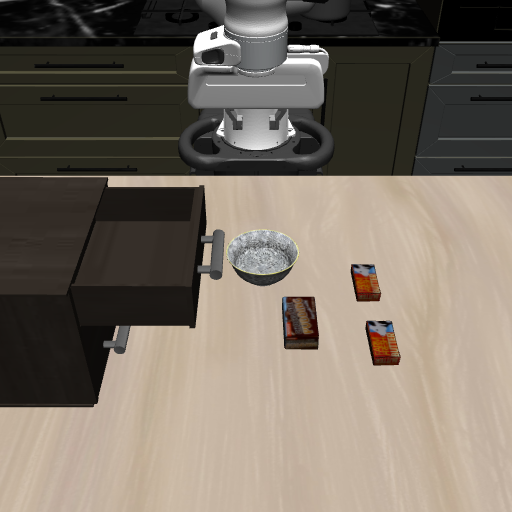

In [572]:
from PIL import Image
ret = env.reset()
display(Image.fromarray(ret["agentview_image"][::-1]))

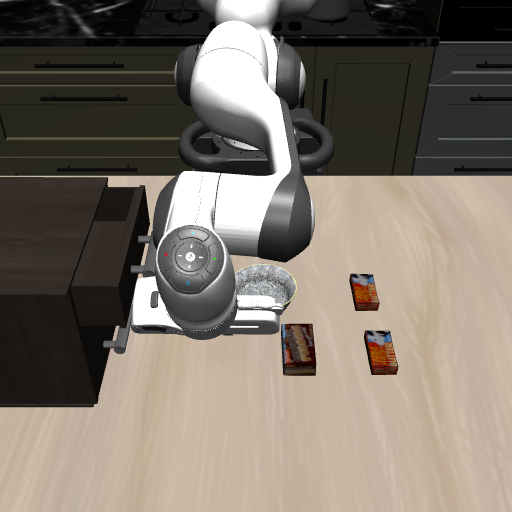

In [617]:
# yy: action space: [delta_x, delta_y, delta_z, rot_axis_x, rot_axis_y, rot_axis_z, gripper]
action = np.array([0, -1, 0, 0., 0., 0, 0])
obs, reward, done, info = env.step(action)
display(Image.fromarray(obs["agentview_image"][::-1]))

In [621]:
curr_sim_state = env.get_sim_state()
curr_sim_state

array([ 2.25000000e+00, -8.21887383e-02,  1.48834491e+00, -1.25616417e-02,
       -2.97698563e-01, -3.53556893e-02,  1.27688772e+00,  7.01990687e-01,
        1.99199701e-02, -2.02630130e-02, -8.26421456e-02,  9.96193070e-03,
        8.98404150e-01,  7.07106783e-01, -2.77553535e-05,  3.33515934e-06,
        7.07106779e-01,  2.13109263e-02,  1.89063156e-01,  9.08680955e-01,
        2.45253374e-11,  7.58041788e-14,  1.10937886e-14,  1.00000000e+00,
       -1.14202290e-01,  1.82310368e-01,  9.08680955e-01,  1.26231865e-11,
        5.69988084e-17,  2.03219043e-17,  1.00000000e+00,  1.97814947e-02,
        6.36282284e-02,  9.13050955e-01,  3.71770455e-12,  5.39351941e-17,
        2.20193261e-17,  1.00000000e+00, -5.71931037e-02,  0.00000000e+00,
        0.00000000e+00, -2.43427211e-01, -1.21643646e-01, -1.57263685e-01,
       -2.21194814e-01,  1.41896298e-02,  1.69561652e-01, -3.33978646e-01,
       -7.08896530e-05,  8.94279324e-05,  1.79983330e-18, -6.09020025e-20,
        2.34240656e-14,  

In [622]:
robot_init_sim_state = curr_sim_state.copy()
robot_init_sim_state[1:10] = robot_init_state
robot_init_sim_state

array([ 2.25000000e+00,  0.00000000e+00, -1.61037389e-01,  0.00000000e+00,
       -2.44459747e+00,  0.00000000e+00,  2.22675220e+00,  7.85398163e-01,
        2.08330000e-02, -2.08330000e-02, -8.26421456e-02,  9.96193070e-03,
        8.98404150e-01,  7.07106783e-01, -2.77553535e-05,  3.33515934e-06,
        7.07106779e-01,  2.13109263e-02,  1.89063156e-01,  9.08680955e-01,
        2.45253374e-11,  7.58041788e-14,  1.10937886e-14,  1.00000000e+00,
       -1.14202290e-01,  1.82310368e-01,  9.08680955e-01,  1.26231865e-11,
        5.69988084e-17,  2.03219043e-17,  1.00000000e+00,  1.97814947e-02,
        6.36282284e-02,  9.13050955e-01,  3.71770455e-12,  5.39351941e-17,
        2.20193261e-17,  1.00000000e+00, -5.71931037e-02,  0.00000000e+00,
        0.00000000e+00, -2.43427211e-01, -1.21643646e-01, -1.57263685e-01,
       -2.21194814e-01,  1.41896298e-02,  1.69561652e-01, -3.33978646e-01,
       -7.08896530e-05,  8.94279324e-05,  1.79983330e-18, -6.09020025e-20,
        2.34240656e-14,  

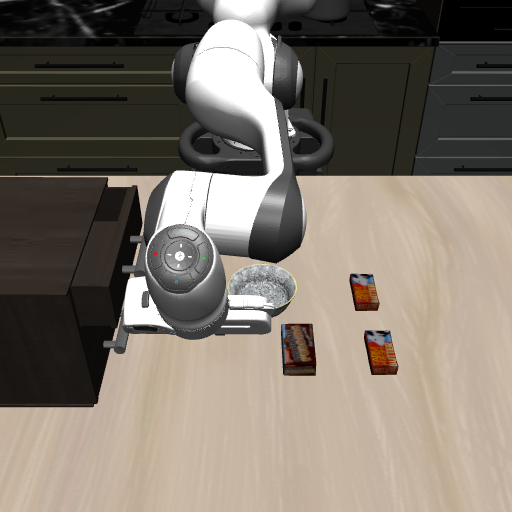

In [623]:
obs, reward, done, info = env.step(action)
display(Image.fromarray(obs["agentview_image"][::-1]))

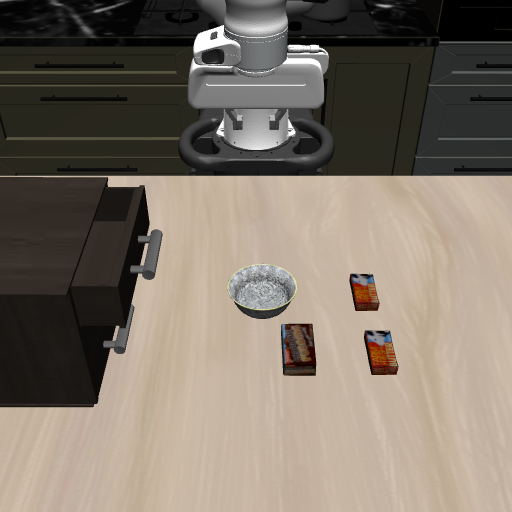

In [624]:
obs = env.set_init_state(robot_init_sim_state)
display(Image.fromarray(obs["agentview_image"][::-1]))

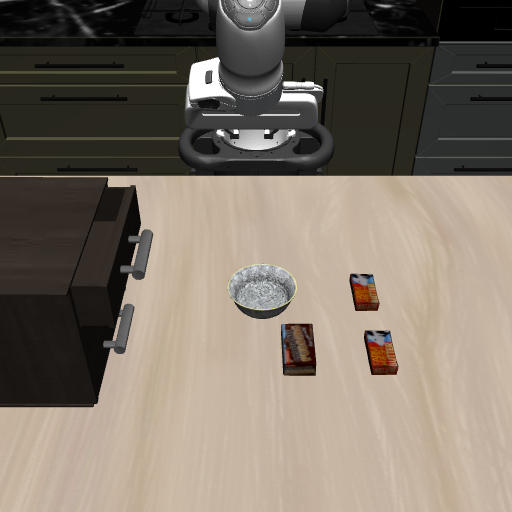

In [627]:
for _ in range(100):
    obs, reward, done, info = env.step(np.array([0, 0, 0, 0, 0, 0, 0]))
display(Image.fromarray(obs["agentview_image"][::-1]))

# =========

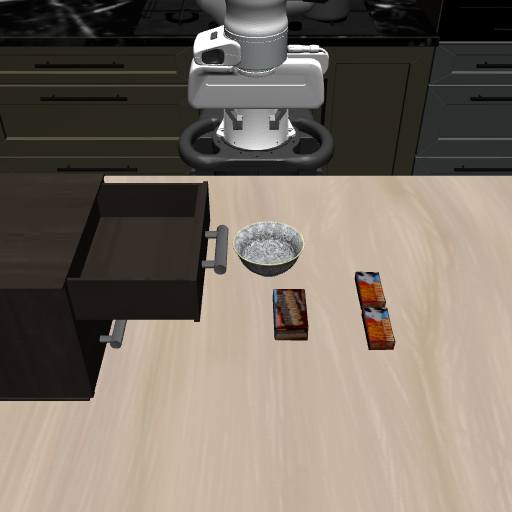

In [721]:
ret = env.reset()
robot_init_sim_state = env.get_sim_state()
display(Image.fromarray(ret["agentview_image"][::-1]))

[ 1.75000000e+00 -3.30192834e-02  4.37869205e-01 -4.49283580e-02
 -2.05901430e+00  4.20317992e-02  2.43380443e+00  6.66501113e-01
  2.01427485e-02 -2.01449281e-02 -1.04579207e-01  1.96889881e-02
  8.98404150e-01  7.07106783e-01 -2.77553535e-05  3.33515934e-06
  7.07106779e-01 -8.52935120e-03  1.86896881e-01  9.08680955e-01
  2.06229233e-11  6.64400170e-17  2.48646217e-17  1.00000000e+00
 -9.44315439e-02  1.86810794e-01  9.08680955e-01  1.92407357e-11
  2.88707137e-17  1.70034486e-17  1.00000000e+00  2.42208748e-03
  5.01470466e-02  9.13050955e-01  3.87422592e-12  4.68438853e-15
  9.24391952e-15  1.00000000e+00 -3.13718904e-02  0.00000000e+00
  0.00000000e+00  1.41704195e-01 -4.61378922e-02  2.70905532e-01
 -4.84094397e-02 -2.19242509e-01  1.17130288e-02  6.12405513e-01
  6.35631780e-05  3.15576336e-04 -1.64257630e-18 -1.09907265e-19
  2.34226221e-14 -5.76916326e-16  5.39020379e-17  6.57649670e-19
  2.55439821e-21 -1.00242818e-17  2.33199564e-14 -1.14407722e-15
  5.82691833e-18  1.82065

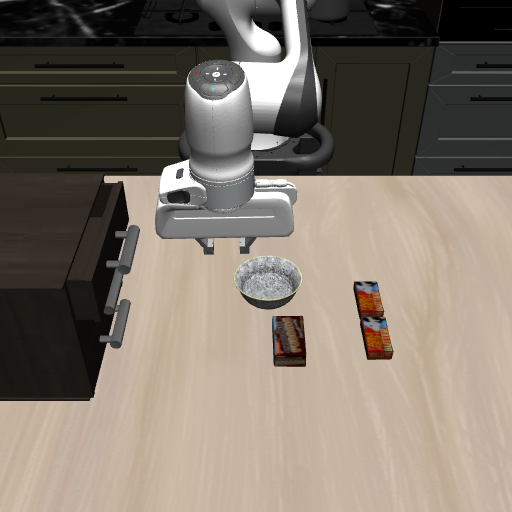

In [722]:
action = np.array([20, 10, -10, 0., 0., 0, 0])
for _ in range(10):
    obs, reward, done, info = env.step(action)
action = np.array([0, -10, 0, 0., 0., 0, 0])
for _ in range(20):
    obs, reward, done, info = env.step(action)
action = np.array([0, 10, 0, 0., 0., 0, 0])
for _ in range(5):
    obs, reward, done, info = env.step(action)
a = env.get_sim_state()
print(a)
display(Image.fromarray(obs["agentview_image"][::-1]))

[ 1.80000000e+00  5.61739850e-14 -1.61037389e-01 -5.37263361e-14
 -2.44459747e+00 -5.40051000e-13  2.22675220e+00  7.85398163e-01
  2.08038962e-02 -2.08038941e-02 -1.04579207e-01  1.96889881e-02
  8.98404150e-01  7.07106783e-01 -2.77553535e-05  3.33515934e-06
  7.07106779e-01 -8.52935120e-03  1.86896881e-01  9.08680955e-01
  2.06229233e-11  6.51349631e-17  1.95589900e-17  1.00000000e+00
 -9.44315439e-02  1.86810794e-01  9.08680955e-01  1.92407357e-11
  2.78938263e-17  2.45858485e-17  1.00000000e+00  2.42208748e-03
  5.01470466e-02  9.13050955e-01  3.87422592e-12  1.41745961e-15
  2.81731650e-15  1.00000000e+00 -3.13718904e-02  0.00000000e+00
  0.00000000e+00  1.88584706e-13  4.18936932e-16 -3.70709817e-14
  9.83622211e-17 -1.30163745e-12  2.22197438e-16 -4.62014048e-13
 -6.99333937e-04  6.99384617e-04  1.16743615e-18 -7.65487007e-20
  2.34237840e-14  2.91157965e-16  8.99580550e-17 -4.83546806e-19
 -3.66063900e-21 -7.93094467e-18  2.33280669e-14 -1.06363888e-15
  1.38876688e-16  1.96867

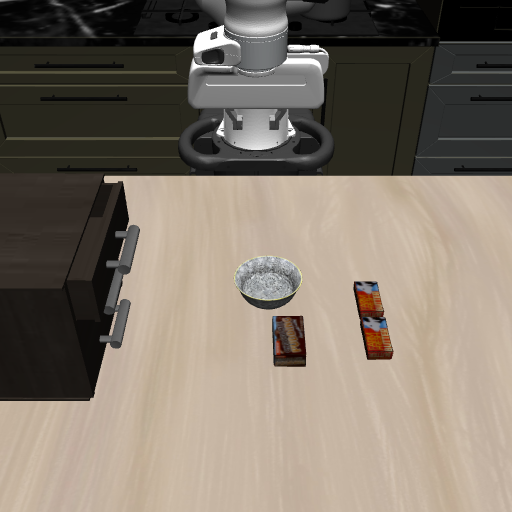

In [723]:
crr_state = env.get_sim_state().copy()
crr_state[1:10] = robot_init_sim_state[1:10]
crr_state[41:] = robot_init_sim_state[41:]
obs = env.set_state(crr_state)
obs, reward, done, info = env.step(np.array([0, 0, 0, 0, 0, 0, 0]))
print(env.get_sim_state())
display(Image.fromarray(obs["agentview_image"][::-1]))

[ 4.30000000e+00  1.50037646e-14 -1.61037389e-01  1.04381760e-14
 -2.44459747e+00  2.62134197e-14  2.22675220e+00  7.85398163e-01
  2.00898335e-02 -2.00897797e-02 -1.04579207e-01  1.96889881e-02
  8.98404150e-01  7.07106783e-01 -2.77553535e-05  3.33515934e-06
  7.07106779e-01 -8.52935120e-03  1.86896881e-01  9.08680955e-01
  2.06229233e-11  7.15753089e-17  2.01312797e-17  1.00000000e+00
 -9.44315439e-02  1.86810794e-01  9.08680955e-01  1.92407357e-11
 -1.36784832e-17  2.12032538e-17  1.00000000e+00  2.42208748e-03
  5.01470466e-02  9.13050955e-01  3.87422592e-12  6.84653352e-17
  1.90317133e-17  1.00000000e+00 -3.13718904e-02  0.00000000e+00
  0.00000000e+00 -5.40301211e-15 -2.42740627e-17  7.01102403e-15
  9.07633892e-18  5.23043624e-14  9.02746584e-18  1.96157848e-14
 -7.88044768e-05  7.88101877e-05 -8.86573496e-19 -3.39874326e-19
  2.34196933e-14 -1.75472013e-15  1.10078641e-17  1.04420132e-18
 -2.28533299e-21 -8.01236248e-18  2.33280669e-14 -9.26961827e-16
  2.07387367e-18  2.00150

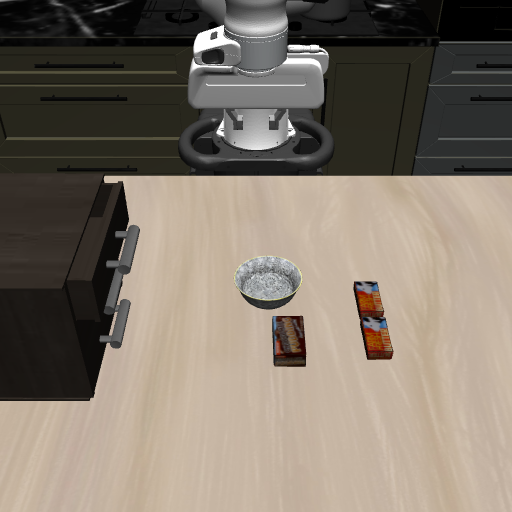

In [724]:
for i in range(50):
    obs, reward, done, info = env.step(np.array([0, 0, 0, 0, 0, 0, 0]))
b = env.get_sim_state()
print(b)
display(Image.fromarray(obs["agentview_image"][::-1]))

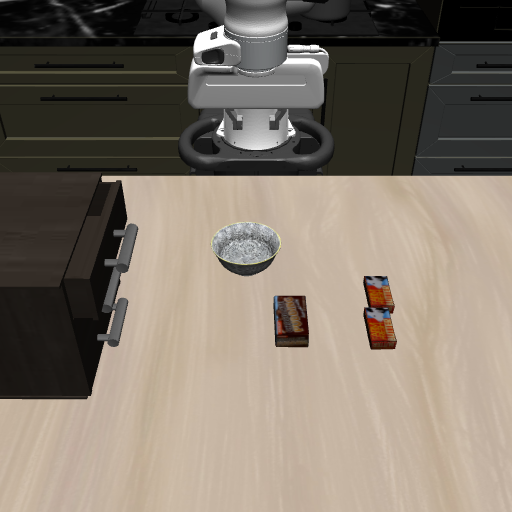

In [711]:
# crr_state = env.get_sim_state().copy()
# crr_state[1:37] = robot_init_sim_state[1:37]
# obs = env.set_state(crr_state)
obs, reward, done, info = env.step(np.array([0, 0, 0, 0, 0, 0, 0]))
display(Image.fromarray(obs["agentview_image"][::-1]))

In [704]:
# (np.vstack([a, b])[0] - np.vstack([a, b])[1]) < 0.01

In [715]:
env.sim.model.nq
env.sim.model.nv

36